In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [2]:
#from xvfbwrapper import Xvfb
#vdisplay = Xvfb(width=1920, height=1080)
#vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [3]:
dataset = kitti_object('./data/object', 'training')

data_idx = 8
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

./data/object training
./data/object\training\velodyne\000008.bin
('All point num: ', 117410)
('FOV point num: ', (19970, 4))
pc_velo (19970, 4)
==================== (19970, 4)
box3d_pts_3d_velo:
[[23.9994061  -0.25283113 -1.59767705]
 [24.1321915  -1.8576718  -1.61324696]
 [19.88802692 -2.20836998 -1.66130651]
 [19.75524151 -0.60352931 -1.64573661]
 [23.98404547 -0.2683622  -0.12783926]
 [24.11683087 -1.87320287 -0.14340917]
 [19.87266629 -2.22390105 -0.19146872]
 [19.73988088 -0.61906038 -0.17589882]]
box3d_pts_3d_velo:
[[16.57952024 11.49695925 -2.12142761]
 [16.44567127 13.07823053 -2.10611787]
 [20.29559263 13.40368973 -2.06244507]
 [20.4294416  11.82241845 -2.07775481]
 [16.560402   11.47762887 -0.2920295 ]
 [16.42655303 13.05890016 -0.27671976]
 [20.27647439 13.38435936 -0.23304696]
 [20.41032336 11.80308807 -0.2483567 ]]
box3d_pts_3d_velo:
[[ 2.17196564e+01  1.18157274e+01 -2.06984265e+00]
 [ 2.16442173e+01  1.35836280e+01 -2.05195047e+00]
 [ 2.61068127e+01  1.37735615e+01 -2.0

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

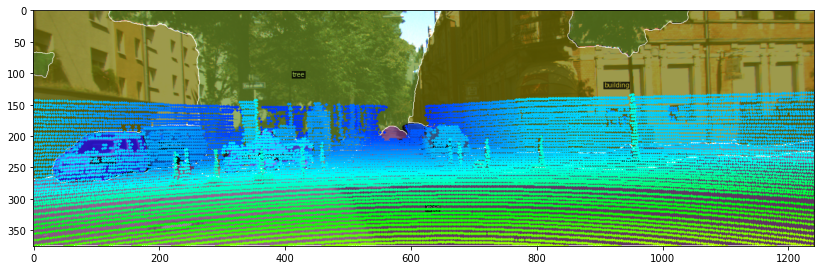

In [4]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

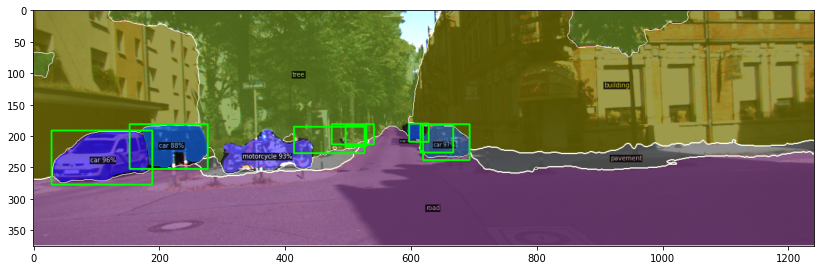

In [5]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

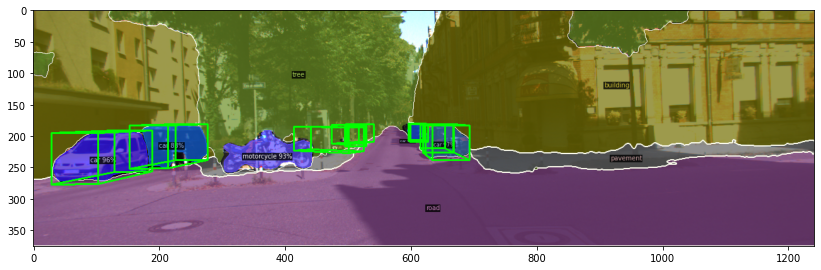

In [6]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


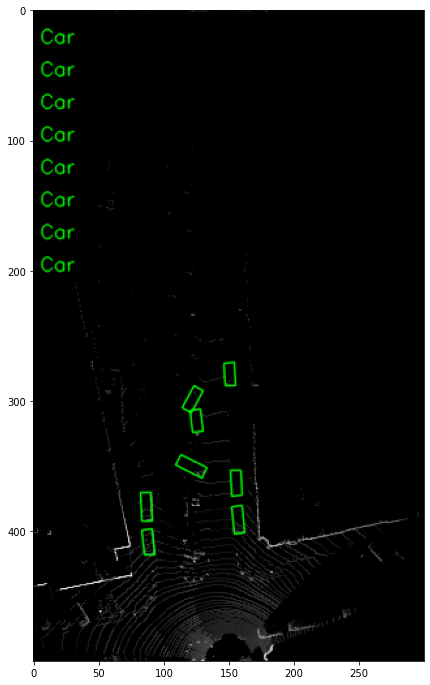

In [7]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()